# Plotting for Exploratory Data Analysis(EDA)


# Haberman dataset 

# About the Data set:
   * Title: Haberman's Survival Data.
   * Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999.
   * Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
   * Number of Instances: 306
   * Number of Attributes: 4 (including the class attribute)
   * Attribute Information:
     * Age of patient at time of operation (numerical)
     * Patient's year of operation (year - 1900, numerical)
     * Survival status (class attribute) 1 = the patient survived 5 years or longer 2 
     * Survival status (class attribute) 2 = the patient died within 5 year 

# objective:
   To classify the survival status of the patient belonging to one of the two classes given three features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as s
haberman=pd.read_csv("haberman.csv")
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
print(haberman.shape)

(306, 4)


In [6]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# observation:
   * status 1 denotes patient will survive 5 years or longer.
   * status 2 denotes patient will dies within 5 years
   * On the above observation we identifies that it is the imbalance dataset.

# 2D scatter plot

**In Haberman dataset it consist of three features(age,year,nodes) so it has three types of combination**

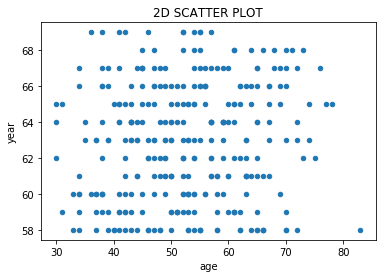

In [3]:
haberman.plot(kind='scatter', x='age', y='year') 
mp.title("2D SCATTER PLOT")
mp.show()

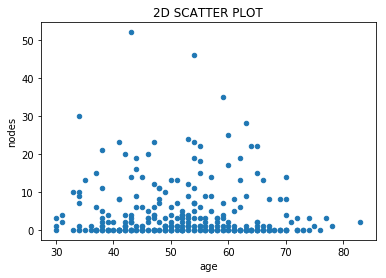

In [5]:
haberman.plot(kind='scatter', x='age', y='nodes') 
mp.title("2D SCATTER PLOT")
mp.show()

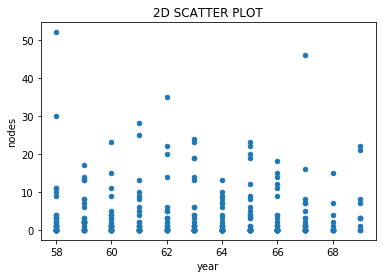

In [4]:
haberman.plot(kind='scatter', x='year', y='nodes')
mp.title("2D SCATTER PLOT")
mp.show()

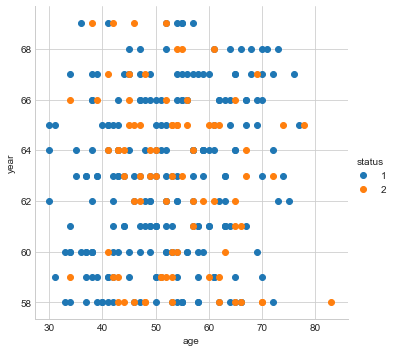

In [66]:
s.set_style("whitegrid");
s.FacetGrid(haberman, hue="status", size=5) \
   .map(mp.scatter, "age", "year") \
   .add_legend();
mp.show();

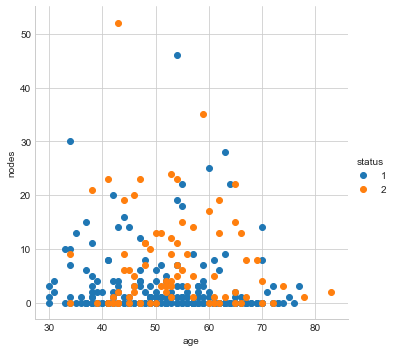

In [67]:
s.set_style("whitegrid");
s.FacetGrid(haberman, hue="status", size=5) \
   .map(mp.scatter, "age", "nodes") \
   .add_legend();
mp.show();

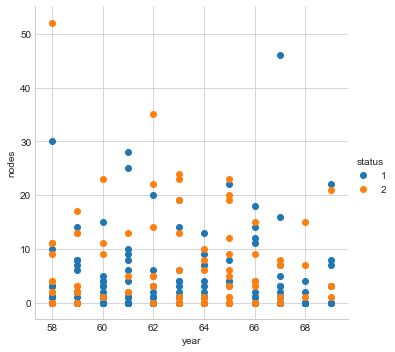

In [68]:
s.set_style("whitegrid");
s.FacetGrid(haberman, hue="status", size=5) \
   .map(mp.scatter, "year", "nodes") \
   .add_legend();
mp.show();

# Observation:
   * Since the given dataset is the unbalanced contain 306 observations in which status1 contain 225 observation 
      and status2 contain 81 observation.
   * In 2D scatter plot all the three combination are difficult to classify the two class label.
   * The two class label are not in the seperate region they where combined with eachother.


# Pair plot

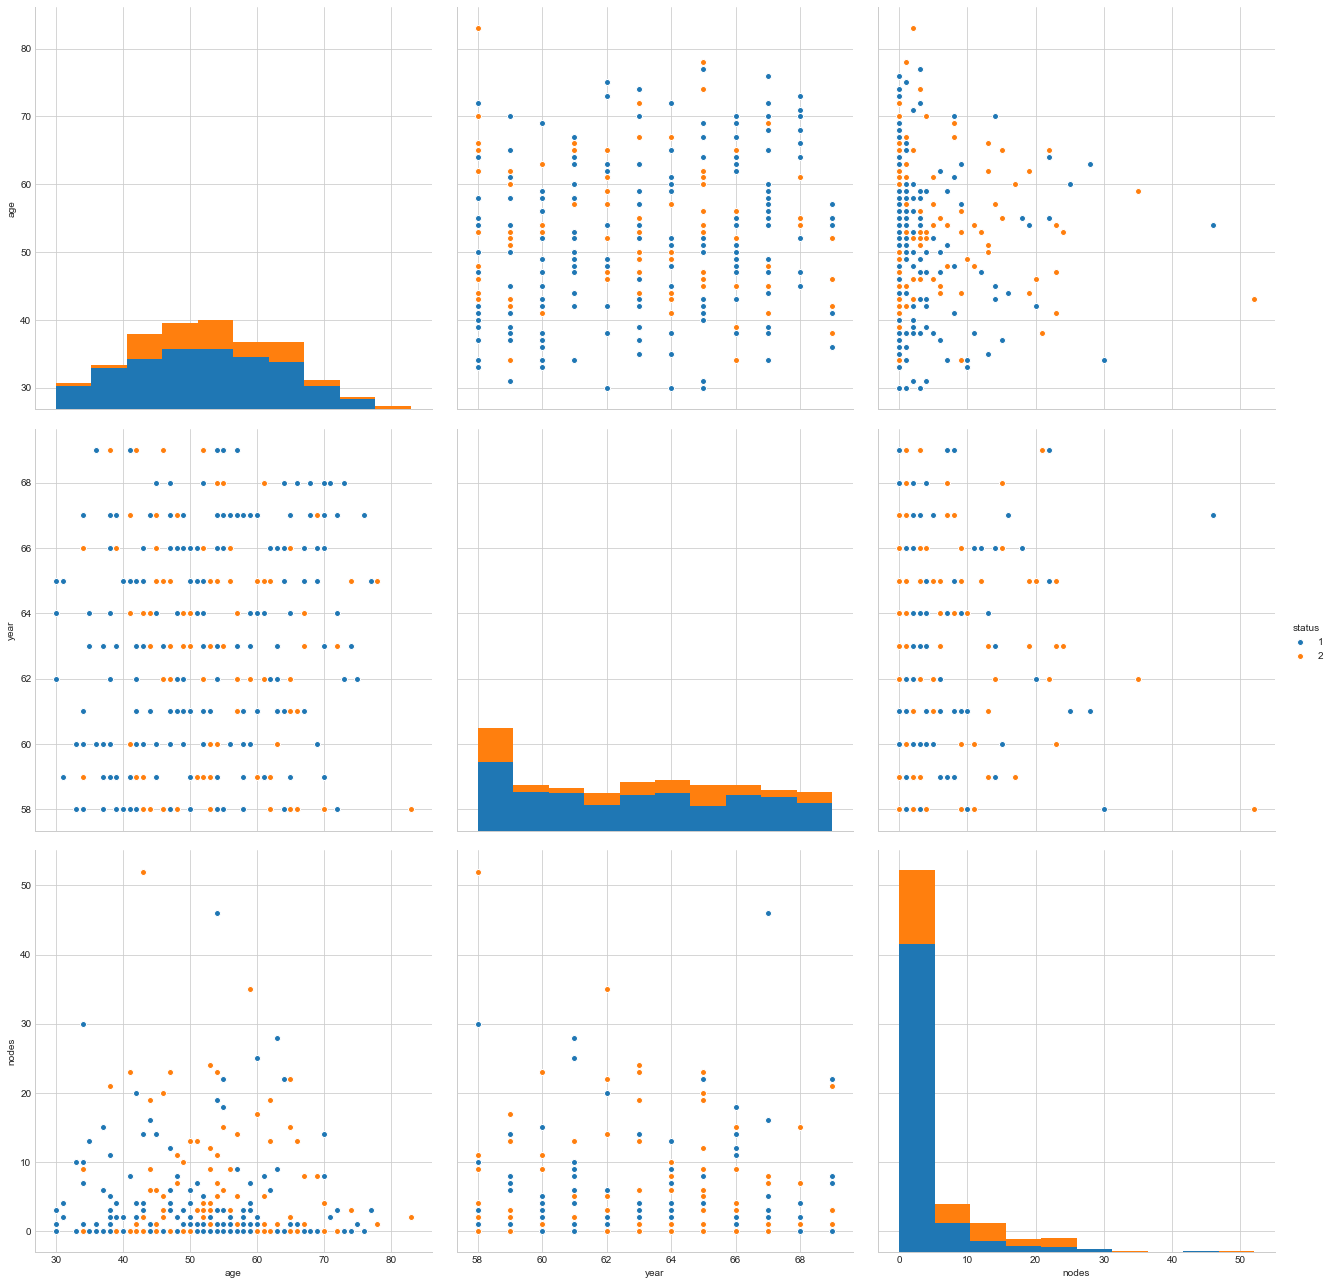

In [43]:
mp.close()
s.set_style("whitegrid")
s.pairplot(data=haberman, hue='status', vars=['age','year','nodes'],size=6)
mp.show()

# Observation:
   * In the above observation of the pair plot we have three features so it forms 3*3 subplots.
   * In the pair plot also we cannot view the datapoints in the seperate region of two class labels.

# Applying Histogram,PDF,CDF:

**In case when we go for one dimension we taking each feature to apply histogram,PDF,CDF.**

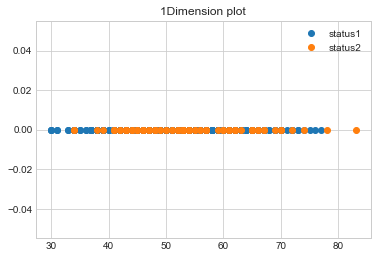

In [10]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
mp.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o',label="status1")
mp.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o',label="status2")
mp.title("1Dimension plot")
mp.legend()
mp.show()

# observation:
   * The above plot we observed that more status2 lies in 40 to 65 ages also we find the oulier of the status2 (beyond the range).

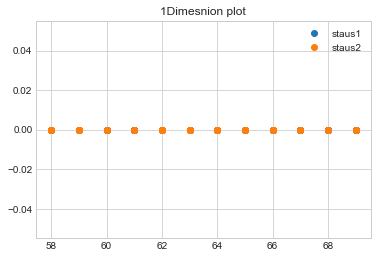

In [11]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
mp.plot(haberman_1["year"], np.zeros_like(haberman_1['year']), 'o',label="status1")
mp.plot(haberman_2["year"], np.zeros_like(haberman_2['year']), 'o',label="status2")
mp.title("1Dimesnion plot")
mp.legend()
mp.show()

# Observation:
   *  Here we observed that the status2 are equaly distributed from each other and we can't visualize status1

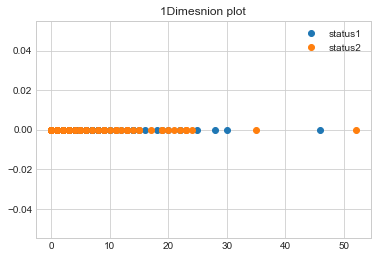

In [12]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
mp.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o',label="status1")
mp.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o',label="status2")
mp.title("1Dimesnion plot")
mp.legend()
mp.show()

# Observation:
  *  The above plot shows that the  most of the status2 lies between 0 to 25 and there are two oulier in this class label.
  * The status1 can be visualize few values

# Applying the Histogram and PDF plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


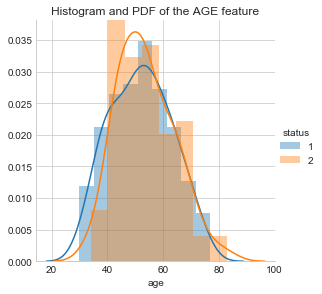

In [44]:
s.FacetGrid(haberman, hue="status", size=4).map(s.distplot, "age").add_legend();
mp.title("Histogram and PDF of the AGE feature")
mp.show();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


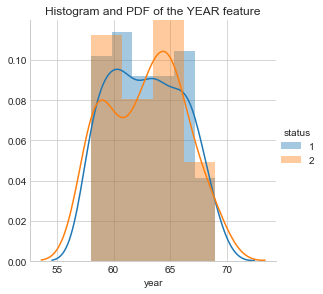

In [46]:
s.FacetGrid(haberman, hue="status", size=4) .map(s.distplot, "year") .add_legend();
mp.title("Histogram and PDF of the YEAR feature")
mp.show();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


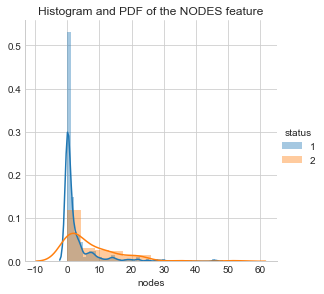

In [45]:
s.FacetGrid(haberman, hue="status", size=4).map(s.distplot, "nodes").add_legend()
mp.title("Histogram and PDF of the NODES feature")
mp.show();

# observation:
   * The above plot are represent the histogram and pdf plot which are taken for each features of two class label.
   

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


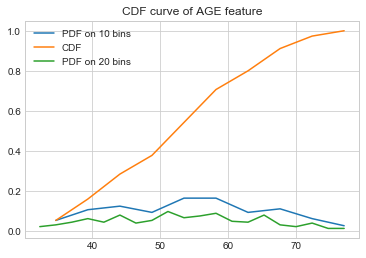

In [54]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, density = True)
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF on 10 bins")
mp.plot(bin_edges[1:],cdf,label="CDF")
counts, bin_edges = np.histogram(haberman_1['age'], bins=20,density = True) 
                                 
pdf = counts/(sum(counts))
mp.plot(bin_edges[1:],pdf,label="PDF on 20 bins")
mp.legend()
mp.title("CDF curve of AGE feature")
mp.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


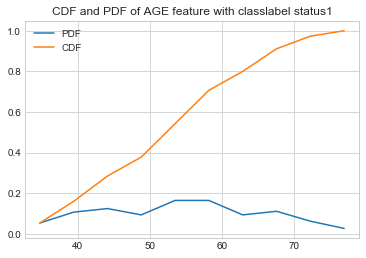

In [69]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF")
mp.plot(bin_edges[1:], cdf,label="CDF")
mp.title("CDF and PDF of AGE feature with classlabel status1")
mp.legend()
mp.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


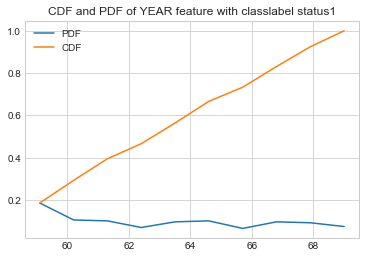

In [68]:
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF")
mp.plot(bin_edges[1:], cdf,label="CDF")
mp.title("CDF and PDF of YEAR feature with classlabel status1")
mp.legend()
mp.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


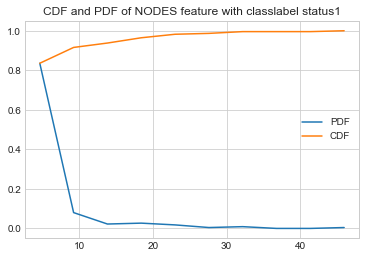

In [66]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF")
mp.plot(bin_edges[1:],cdf,label="CDF")
mp.title("CDF and PDF of NODES feature with classlabel status1")
mp.legend()
mp.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


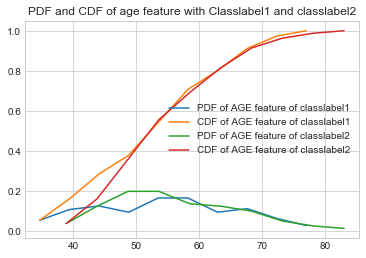

In [71]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of AGE feature of classlabel1")
mp.plot(bin_edges[1:], cdf,label="CDF of AGE feature of classlabel1")
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of AGE feature of classlabel2")
mp.plot(bin_edges[1:], cdf,label="CDF of AGE feature of classlabel2")
mp.legend()
mp.title("PDF and CDF of age feature with Classlabel1 and classlabel2")
mp.show();

# Observation:
   * The above graph represent the CDF and PDF of one feature AGE of the two class labels.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


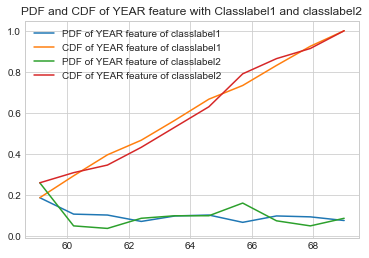

In [74]:
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of YEAR feature of classlabel1 ")
mp.plot(bin_edges[1:], cdf,label="CDF of YEAR feature of classlabel1")
counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of YEAR feature of classlabel2")
mp.plot(bin_edges[1:], cdf,label="CDF of YEAR feature of classlabel2")
mp.legend()
mp.title("PDF and CDF of YEAR feature with Classlabel1 and classlabel2")
mp.show();

# Observation:
   * The above plot represent the PDF and CDF of one feature YEAR of the two class labels.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


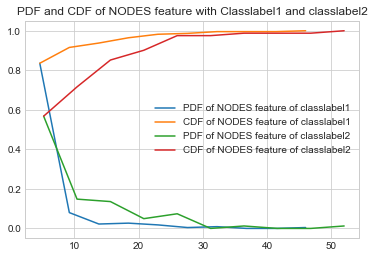

In [73]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of NODES feature of classlabel1")
mp.plot(bin_edges[1:], cdf,label="CDF of NODES feature of classlabel1")
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf,label="PDF of NODES feature of classlabel2")
mp.plot(bin_edges[1:], cdf,label="CDF of NODES feature of classlabel2")
mp.legend()
mp.title("PDF and CDF of NODES feature with Classlabel1 and classlabel2")
mp.show();

# Observation:
   * The above plot represent the PDF and CDF of one feature NODES of the two class labels. 

# Mean,Variance, Standard Deviation 

In [74]:
#calculation of mean,standard deviation of the AGE feature
print("Age Means:")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))

print("\n Age Std-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))
#calculation of mean,standard deviation of the YEAR feature
print("\nYear Means:")
print(np.mean(haberman_1["year"]))
print(np.mean(haberman_2["year"]))

print("\nYear Std-dev:");
print(np.std(haberman_1["year"]))
print(np.std(haberman_2["year"]))
#calculation of mean,standard deviation of the NODES feature
print("\nNodes Means:")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

print("\nNodes Std-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))


Age Means:
52.01777777777778
53.67901234567901

 Age Std-dev:
10.98765547510051
10.10418219303131

Year Means:
62.86222222222222
62.82716049382716

Year Std-dev:
3.2157452144021956
3.3214236255207883

Nodes Means:
2.7911111111111113
7.45679012345679

Nodes Std-dev:
5.857258449412131
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [78]:
#calculation of Median,Percentile,Quantile,IQR,MAD for AGE feature
print("AGE")
print("\nMedians:")
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))
print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))
print("\n95th Percentiles:")
print(np.percentile(haberman_1["age"],95))
print(np.percentile(haberman_2["age"],95))
print("\n99th Percentiles:")
print(np.percentile(haberman_1["age"],99))
print(np.percentile(haberman_2["age"],99))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))
#calculation of Median,Percentile,Quantile,IQR,MAD for YEAR feature
print("\nYEAR")
print("\nMedians:")
print(np.median(haberman_1["year"]))
print(np.median(haberman_2["year"]))
print("\nQuantiles:")
print(np.percentile(haberman_1["year"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["year"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["year"],90))
print(np.percentile(haberman_2["year"],90))
print("\n95th Percentiles:")
print(np.percentile(haberman_1["year"],95))
print(np.percentile(haberman_2["year"],95))
print("\n99th Percentiles:")
print(np.percentile(haberman_1["year"],99))
print(np.percentile(haberman_2["year"],99))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["year"]))
print(robust.mad(haberman_2["year"]))
#calculation of Median,Percentile,Quantile,IQR,MAD for NODES feature
print("\nNODES")
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))
print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))
print("\n95th Percentiles:")
print(np.percentile(haberman_1["nodes"],95))
print(np.percentile(haberman_2["nodes"],95))
print("\n99th Percentiles:")
print(np.percentile(haberman_1["nodes"],99))
print(np.percentile(haberman_2["nodes"],99))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))


AGE

Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

95th Percentiles:
70.0
70.0

99th Percentiles:
74.75999999999999
79.00000000000001

Median Absolute Deviation
13.343419966550417
11.860817748044816

YEAR

Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

95th Percentiles:
68.0
68.0

99th Percentiles:
69.0
69.0

Median Absolute Deviation
4.447806655516806
4.447806655516806

NODES

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

95th Percentiles:
14.0
23.0

99th Percentiles:
27.279999999999973
38.40000000000005

Median Absolute Deviation
0.0
5.930408874022408


#  Box plot and Whiskers

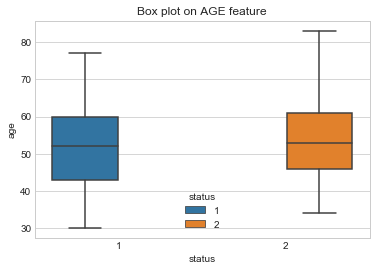

In [23]:
s.boxplot(x='status',y='age',hue="status", data=haberman)
mp.title("Box plot on AGE feature")
mp.show()

# observation:
   **The above plot show that**
   * status 1
      * 25 percentile lies above 40 age
      * 50 percentile lies above 50 age
      * 75 percentile lies exactly 60 age
   * status 2
      * 25 percentile lies above 40 age
      * 50 percentile lies above 50 age
      * 75 percentile lies above 60 age

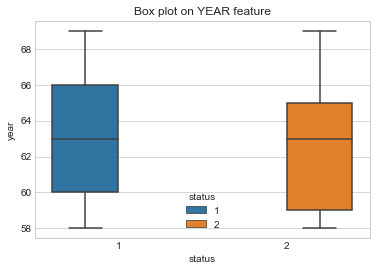

In [24]:
s.boxplot(x='status',y='year', data=haberman,hue="status")
mp.title("Box plot on YEAR feature")
mp.show()

# observation:
   **The above plot show that**
   * status 1
      * 25 percentile lies exactly 1960 year
      * 50 percentile lies above 1962 year
      * 75 percentile lies exactly 1966 year
   * status 2
      * 25 percentile lies above 1958 year
      * 50 percentile lies above 1962 year
      * 75 percentile lies above 1964 year

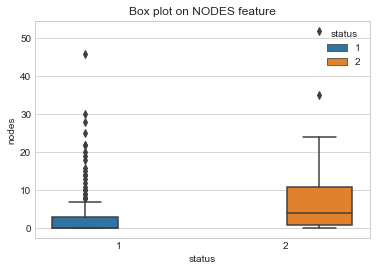

In [26]:
s.boxplot(x='status',y='nodes',hue="status",data=haberman)
mp.title("Box plot on NODES feature")
mp.show()

# observation:
   **The above plot show that**
   * status 1
      * we find many outlier (beyond the range) 
   * status 2
      * 25 percentile lies above 0 nodes
      * 50 percentile lies above 4 nodes
      * 75 percentile lies above 10 nodes
      * we find some outlier (beyond the range)

# Violin plots

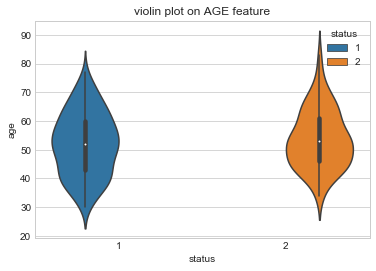

In [35]:
s.violinplot(x="status", y="age", data=haberman,hue="status",size=4)
mp.title("violin plot on AGE feature")
mp.show()

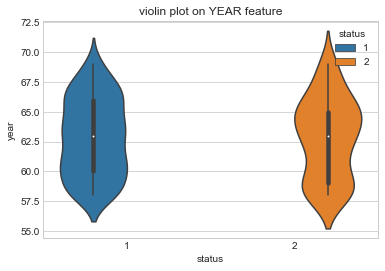

In [36]:
s.violinplot(x="status", y="year", data=haberman,hue="status",size=4)
mp.title("violin plot on YEAR feature")
mp.show()

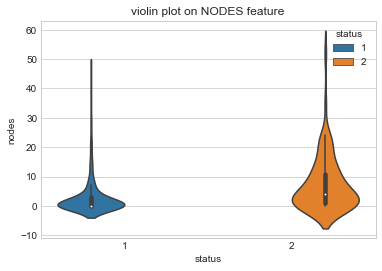

In [37]:
s.violinplot(x="status", y="nodes", data=haberman,hue="status",size=4)
mp.title("violin plot on NODES feature")
mp.show()

# Observation:
   * The above plot represent the violin plot which has one feature of two class labels.

# Conclusion of the Dataset:
   * Thus the above given dataset have three features and two class labels.
   * By given dataset we cannot classify the the class labels in the seperate manner.
   * The above plot and calculation are just analyizing the data rather than classifying it.